
# Project 2: TMDb Movies Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMdb dataset contains about 10,000 movie information collected from The Movie Database, that information including budget, revenues, genres, rating, release year...etc for each movie, and we analyzed thees data based on some questions that we want to answer it.

### Research Question
- Does the number of votes for movies increase or decrease over time?
- Does the budget of the movies increase over the years?
- In which year was the largest number of movies produced?
- Do Movies with higher average ratings generally receive better revenue?
- What is the average run time for movies?
- What are the top 10 movies by the highest Average Rating?

In [1]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load the data, check for types and quantity of the dataset and explore their problems, then clean the dataset by many steps to doing the analysis in the proper way.

#### Load and read the data

In [2]:
# create a data frame and read the data by pandas.
df_movies = pd.read_csv('TMDb_movies.csv')

#### Print sample of data to make sure that structure is fine and understand the data

In [3]:
# display first 5 rows.
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Display the number of rows and columns of the dataset

In [4]:
df_movies.shape

(10866, 21)

#### Display summary of information about the dataset such as number of entries, datatype and non-values for each characteristic 

In [5]:
# display some information about the data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Get the summary of discriptive data for each numeric characteristic

In [6]:
# display the information of descriptive data for numeric values
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


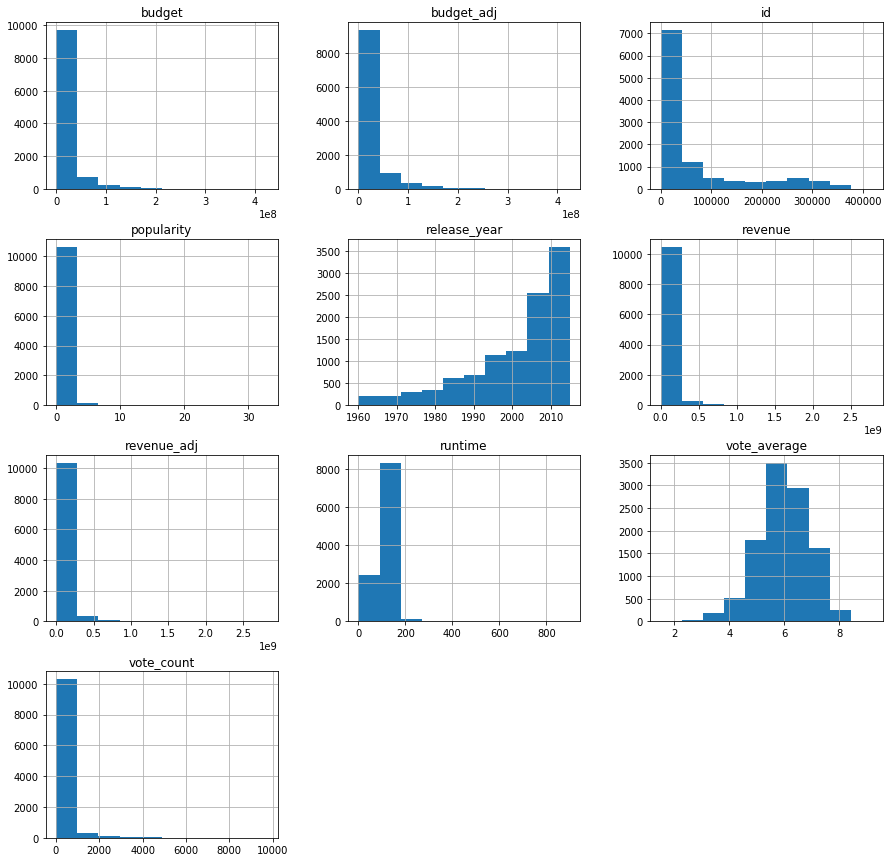

In [7]:
# Show the distribution of data
df_movies.hist(figsize=(15,15));

### Conclusion

- We have  **10866** rows and **21** columns of data
- We have **11** strings, **6** integers and **4** floats datatypes.
- We have values without currency such as budget, revenue, we will assume it is in dollars.
- There are missing values in imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.
- There are unnecessary columns to analyze that should be deleted.
- There are some problems with the dataset such as formats, fields with sevral values seperated by "|", zero's values and NaN values


-------------------------------------------------------------------------------------------------------------------

After the data has been viewed, now we have a clear understanding of this data and we will begin the process of cleaning data.

### Data Cleaning

> 1. Dropping the unnecessary columns.
> 2. Dropping or replacing the rows that have null or zero values "handling with missing values".
> 3. Dropping the rows that have duplicate values "handling with duplicated values".
> 4. Converting some datatype.



#### 1. Dropping the unnecessary columns.

In [8]:
# display columns names in order to get its names quickly
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# delete columns that we don't need it for our analysis
df_movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], 
               axis=1, inplace=True)

In [10]:
# check for deleting
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


#### 2. Dropping or replacing the rows that have null or zero values "handling with missing values".

In [11]:
# check for null values for each column
df_movies.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

> In this situation, the best way is replacing these values with the average(mean) given that they are small values compared to the whole data, but all of these values are string data type, so we cannot replace it with mean! we should delete it.

In [12]:
# check for 0's values for each column
df_movies.isin([0]).sum()

popularity           0
budget            5696
revenue           6016
original_title       0
cast                 0
director             0
runtime             31
genres               0
vote_count           0
vote_average         0
release_year         0
dtype: int64

> We have a lot of 0's values that don't help with our analysis, so we have to replace it with null values in order to remove it.

In [13]:
# convert any ZERO value to NaN by numpy
df_movies = df_movies.replace(0, np.nan)

In [14]:
# check if 0's values converted to NAN
df_movies.isin([0]).sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [15]:
# after converting 0's to null values, check for null values for each column again
df_movies.isnull().sum()

popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime             31
genres              23
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [16]:
# Drop all null values
df_movies = df_movies.dropna()

In [17]:
# check if there are null values doesn't have been deleted yet
df_movies.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [18]:
# check for number of rows and columns after dropping null values
df_movies.shape

(3850, 11)

> Now, we have only 3850 entries to work with.

#### 3. Dropping the rows that have duplicate values "handling with duplicated values".

In [19]:
# check if we have duplicated data
df_movies.duplicated().sum()

1

> We have 1 duplicated value.

In [20]:
# drop duplicated row
df_movies.drop_duplicates(inplace=True)

In [21]:
# check after deleted
df_movies.duplicated().sum()

0

In [22]:
# check for number of rows and columns after dropping duplicates values
df_movies.shape

(3849, 11)

> Now, we have only 3849 entries to work with.

#### 4. Converting some datatypes


In [23]:
# convert budget, revenue and runtime from float to integer to improve our analysis
df_movies.budget = df_movies.budget.astype(int)
df_movies.revenue = df_movies.revenue.astype(int)
df_movies.runtime = df_movies.runtime.astype(int)

In [24]:
# check if there are been converted
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3849 non-null   float64
 1   budget          3849 non-null   int32  
 2   revenue         3849 non-null   int32  
 3   original_title  3849 non-null   object 
 4   cast            3849 non-null   object 
 5   director        3849 non-null   object 
 6   runtime         3849 non-null   int32  
 7   genres          3849 non-null   object 
 8   vote_count      3849 non-null   int64  
 9   vote_average    3849 non-null   float64
 10  release_year    3849 non-null   int64  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 315.7+ KB


### Let's take a final look at our data after cleaning and make sure that everything fine.

In [25]:
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [26]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3849 non-null   float64
 1   budget          3849 non-null   int32  
 2   revenue         3849 non-null   int32  
 3   original_title  3849 non-null   object 
 4   cast            3849 non-null   object 
 5   director        3849 non-null   object 
 6   runtime         3849 non-null   int32  
 7   genres          3849 non-null   object 
 8   vote_count      3849 non-null   int64  
 9   vote_average    3849 non-null   float64
 10  release_year    3849 non-null   int64  
dtypes: float64(2), int32(3), int64(2), object(4)
memory usage: 315.7+ KB


In [27]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000
mean,1.192933,3.724886e+07,1.065342e+08,109.217459,528.387114,6.168693,2001.258249
std,1.475622,4.221699e+07,1.750891e+08,19.914141,880.333629,0.794697,11.285642
min,0.001117,1.000000e+00,-2.147484e+09,15.000000,10.000000,2.200000,1960.000000
25%,0.463337,1.000000e+07,1.362008e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.798582,2.400000e+07,4.486219e+07,106.000000,205.000000,6.200000,2004.000000
75%,1.374300,5.000000e+07,1.242721e+08,119.000000,581.000000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.068178e+09,338.000000,9767.000000,8.400000,2015.000000


In [28]:
df_movies.shape

(3849, 11)

<a id='eda'></a>
## Exploratory Data Analysis

> After the data has been cleaned, now we can explore the data and make visualization to get answers for our research questions

### Research Question 1:  Does the number of votes for movies increase or decrease over time?
To answer this question, we should calculate the number of average rating of the movies for each year.

In [29]:
# number of votes for each year
df_count_votes = df_movies.groupby('release_year')['vote_count'].sum()
df_movies.groupby('release_year')['vote_count'].sum()

release_year
1960      1863
1961      1914
1962      1606
1963      1574
1964      2404
1965      1109
1966       226
1967      2466
1968      3042
1969       882
1970      1398
1971      3607
1972      4676
1973      3509
1974      4348
1975      5109
1976      3954
1977      6981
1978      3626
1979      7143
1980      9410
1981      6295
1982      9531
1983      7980
1984     12672
1985     10614
1986     10731
1987     11930
1988     11378
1989     15731
1990     18372
1991     14429
1992     15211
1993     19992
1994     32742
1995     30871
1996     22040
1997     37072
1998     33984
1999     48084
2000     41735
2001     57798
2002     56582
2003     61345
2004     72559
2005     64955
2006     65303
2007     76613
2008     87966
2009    103208
2010    115480
2011    121196
2012    160618
2013    182607
2014    169922
2015    155369
Name: vote_count, dtype: int64

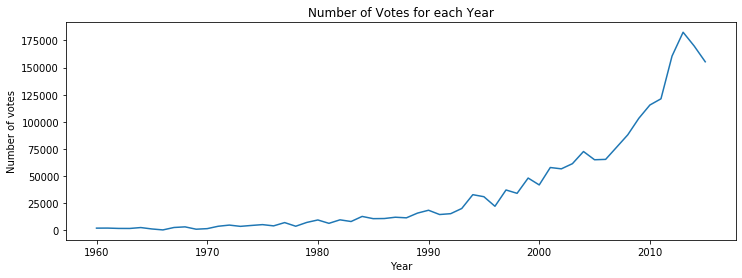

In [30]:
# plot the line chart to explore that.
df_count_votes.plot(kind='line', figsize=(12,4))
plt.title('Number of Votes for each Year')
plt.xlabel('Year')
plt.ylabel('Number of votes');

> ##### We notice by the line chart that the number of votes increases with the passage of years, there is also a clear and continuous increase from 1990 until now.

### Research Question 2: Does the budget of the movies increase over the years?
To answer this question, we should make a scatter plot that shows the budget of the movies for each year.

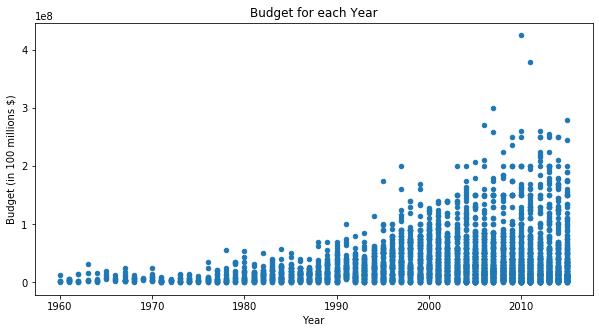

In [31]:
# plot the scatter visualization to explore that
df_movies.plot(kind='scatter', x='release_year', y='budget', figsize=(10,5))
plt.title('Budget for each Year')
plt.xlabel('Year')
plt.ylabel('Budget (in 100 millions $)');

> ##### We notice by the scatter plot that the budget increases with the passage of years (Positave Correlation).

### Research Question 3: In which year was the largest number of movies produced?
To answer this question, we should count the number of movies for each year, then get the max number.

In [32]:
# Get the number of movies for each year
df_total_movies = df_movies.groupby('release_year')['release_year'].count()
df_movies.groupby('release_year')['release_year'].count()

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     56
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    126
2003    121
2004    147
2005    163
2006    169
2007    164
2008    166
2009    174
2010    178
2011    199
2012    157
2013    180
2014    165
2015    160
Name: release_year, dtype: int64

In [33]:
# calculate the max number and get the year 
df_total_movies.max(), df_total_movies.idxmax(axis=1)

(199, 2011)

> ##### The largest number of movies was produced in 2011, with 199 movies.

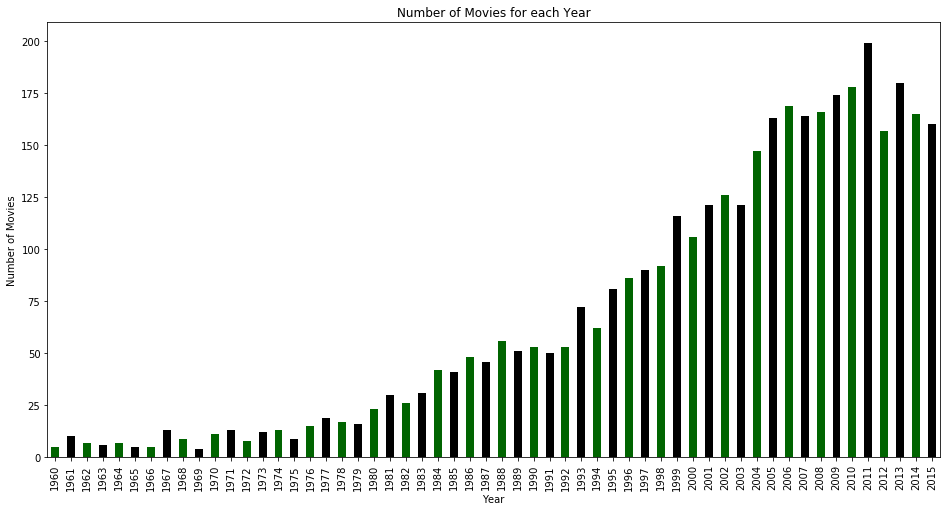

In [34]:
# plot this result in bar chart
df_total_movies.plot(kind='bar', figsize=(16,8), color=['darkgreen', 'black'])
plt.title('Number of Movies for each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies');

> ##### We noticed by the bar chart that 2011 is the year in which the largest number of movies was produced.

### Research Question 4: Do Movies with higher average ratings generally receive better revenue?
To answer this question, we should make a scatter plot that shows the average rating and revenue for each movie.

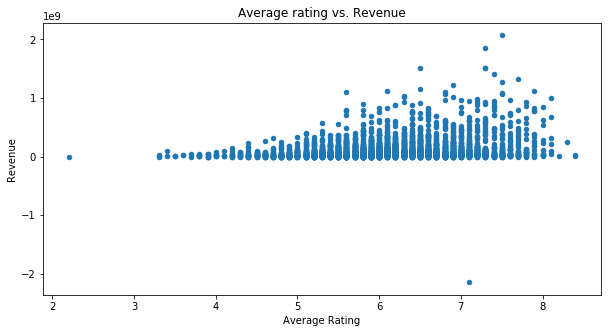

In [35]:
# plot a scatter to clarify the relationship between revenue and an average rating
df_movies.plot(kind='scatter', x='vote_average', y='revenue', figsize=(10,5))
plt.title('Average rating vs. Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Revenue');

> It seems we have one outlier value (negative value), let's remove it

In [36]:
# show the row that has the outlier value
df_movies[df_movies['revenue'] < 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
1386,9.432768,237000000,-2147483648,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009


In [37]:
# Delete the row by index
df_movies.drop([1386], inplace=True)

In [38]:
# Check if this row deleted
df_movies[df_movies['revenue'] < 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year


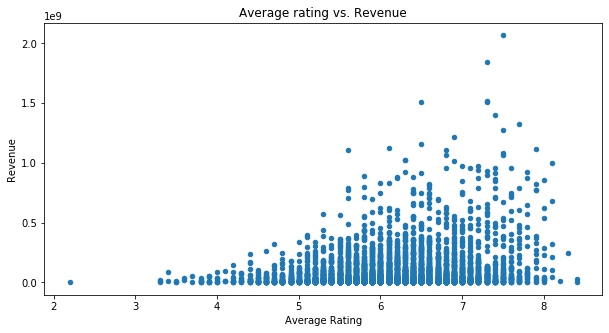

In [39]:
# Now, plot a scatter to clarify the relationship between revenue and an average rating again
df_movies.plot(kind='scatter', x='vote_average', y='revenue', figsize=(10,5))
plt.title('Average rating vs. Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Revenue');

> ##### Well, We notice by the scatter plot that the relation between the revenue and average rating is positive, which means that movies with higher revenue generally receive a high rating.

### Research Question 5: What is the average run time for movies?
To answer this question, we have to calculate the average of run time.

In [40]:
# calculate the average
df_movies['runtime'].mean()

109.20374220374221

> ##### The Average of runtime is: 109.20

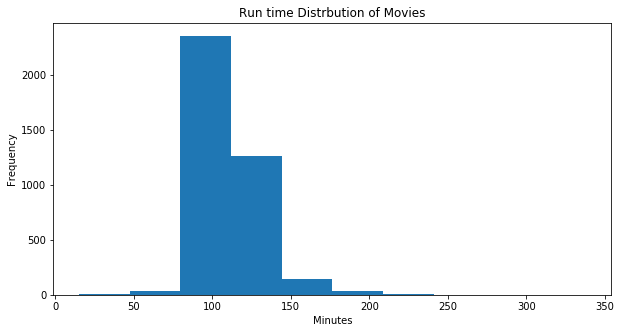

In [41]:
# plot a histogram to clarify the distribution
df_movies['runtime'].plot(kind='hist', figsize=(10,5))
plt.title('Run time Distrbution of Movies')
plt.xlabel('Minutes');

> ##### We notice by the histogram plot that the distribution of run time for the movies in general about 100-120 minutes.

### Research Question 6: What are the top 10 movies by the highest Average Rating?
To answer this question, we have to sort the average rating of the movies then get the first 10 movies.

In [42]:
# Sort the movies by average rating in a descending way
sorted_movies = df_movies['vote_average'].sort_values(ascending=False).head(10)
df_movies['vote_average'].sort_values(ascending=False).head(10)

4178     8.4
7948     8.4
7269     8.3
650      8.2
9758     8.1
10222    8.1
2409     8.1
2875     8.1
4177     8.1
4179     8.1
Name: vote_average, dtype: float64

In [43]:
# Put the top 10 titles of movies and their average rating in two lists in order to display them with each other
top_movies = []
vote_average = []
for i in sorted_movies.index:
    top_movies.append(df_movies.loc[i,'original_title'])
    vote_average.append(sorted_movies.loc[i])

In [44]:
# create a new data frame in order to display the titles and rating together in one table
df_topmovies = pd.DataFrame()

In [45]:
# Assign the lists in two new columns in the data frame and display the result
df_topmovies['Title'] = top_movies
df_topmovies['Rating'] = vote_average
df_topmovies

,Title,Rating
0,The Shawshank Redemption,8.4
1,Stop Making Sense,8.4
2,The Godfather,8.3
3,Whiplash,8.2
4,The Godfather: Part II,8.1
5,Schindler's List,8.1
6,Fight Club,8.1
7,The Dark Knight,8.1
8,Pulp Fiction,8.1
9,Forrest Gump,8.1


> ##### Now, We have the "Top 10 Movies" by the average rating.

<a id='conclusions'></a>
## Conclusions

> The TMDb dataset was assessed, cleaned and analyzed by many steps shown in this document.
In the Data Wrangling section, data was readed at the beginning of the analysis process, then we reviewed and displayed data in order to understand it such as columns and their content, number of entries and columns, data types, summarization of discriptive data, and display the data distribution. After that we cleaned the data by deleting unneccesory columns in our analysis, replacing and deleting zero, null and duplicated values, converting the datatypes that need to be converted. After completing these steps, we moved to the Exploring Data Analysis section, where our research questions were answered, and the data was visulized in several ways.

> After answering the questions, we obtained the following conclusions:
- The number of votes for movies increases over the years.
- The budget of movies increases over the years.
- **2011** is the year in which the largest number of movies was produced.
- Movies with high rating generally receive a high revenue.
- The average runtime for movies is **109.20**.